In [34]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from utils import load_all_data

# Load Data

In [2]:
all_data = load_all_data()

all_data.head()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
i64,str,i64,f64,f64,f64,f64,f64,f64,bool
0,"""male""",36,189.0,82.0,26.0,101.0,41.0,150.0,true
1,"""female""",64,163.0,60.0,8.0,85.0,39.7,34.0,true
2,"""female""",51,161.0,64.0,7.0,84.0,39.8,29.0,true
3,"""male""",20,192.0,90.0,25.0,105.0,40.7,140.0,true
4,"""female""",38,166.0,61.0,25.0,102.0,40.6,146.0,true


# Basic Univariate Analyses of Training Data

In [3]:
train_data = all_data.filter(pl.col("train") == True)

In [4]:
train_data.describe()

statistic,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",750000.0,"""750000""",750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",374999.5,null,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781,1.0
"""std""",216506.495284,null,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349,null
"""min""",0.0,"""female""",20.0,126.0,36.0,1.0,67.0,37.1,1.0,1.0
"""25%""",187500.0,null,28.0,164.0,63.0,8.0,88.0,39.6,34.0,null
"""50%""",375000.0,null,40.0,174.0,74.0,15.0,95.0,40.3,77.0,null
"""75%""",562499.0,null,52.0,185.0,87.0,23.0,103.0,40.7,136.0,null
"""max""",749999.0,"""male""",79.0,222.0,132.0,30.0,128.0,41.5,314.0,1.0


In [5]:
# proportions of men and women?
train_data['Sex'].value_counts(normalize=True)

Sex,proportion
str,f64
"""female""",0.500961
"""male""",0.499039


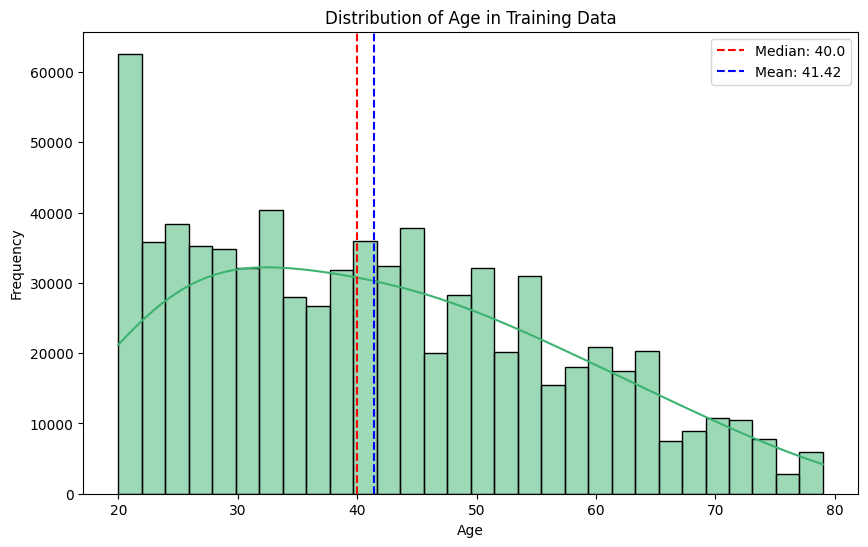

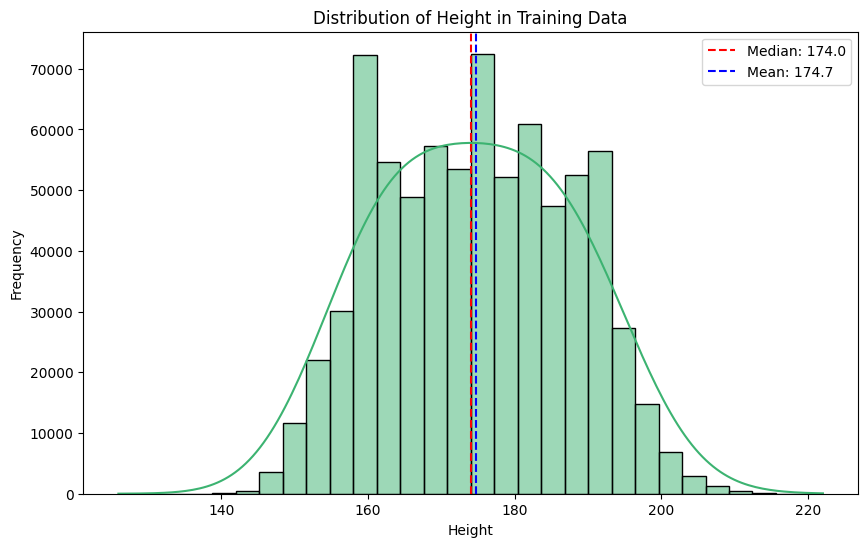

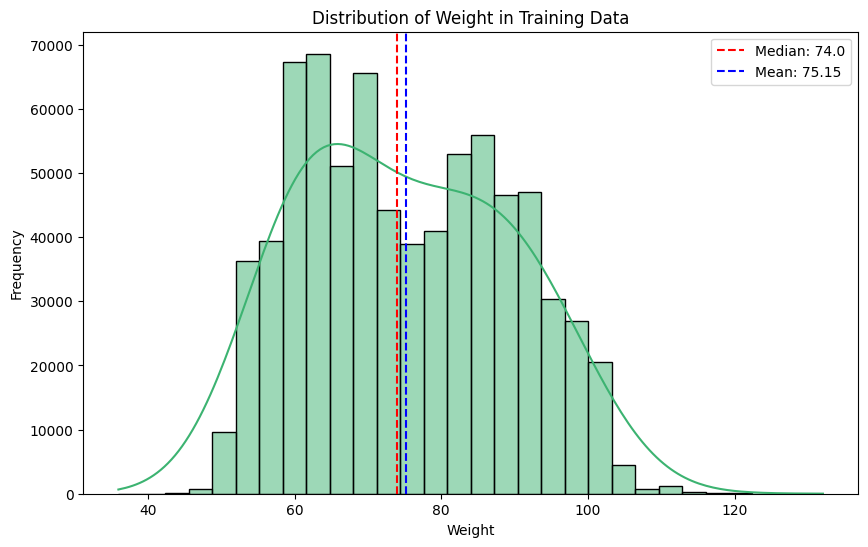

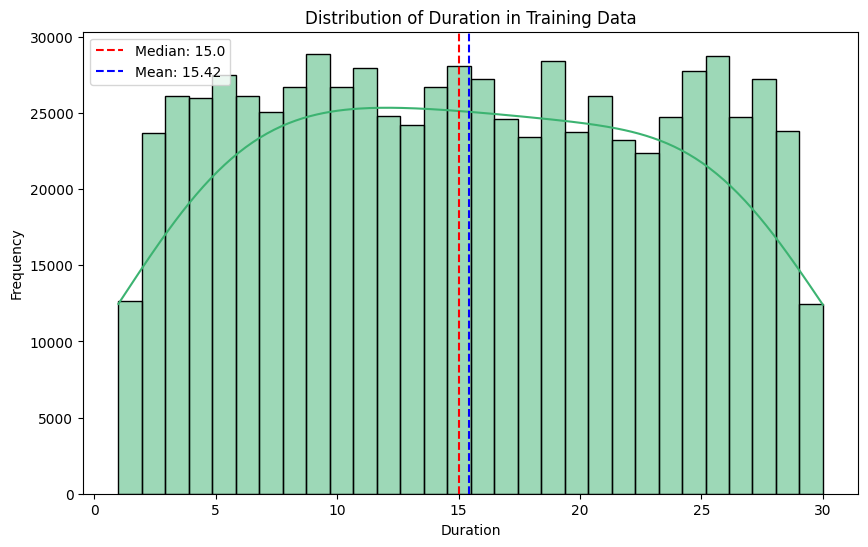

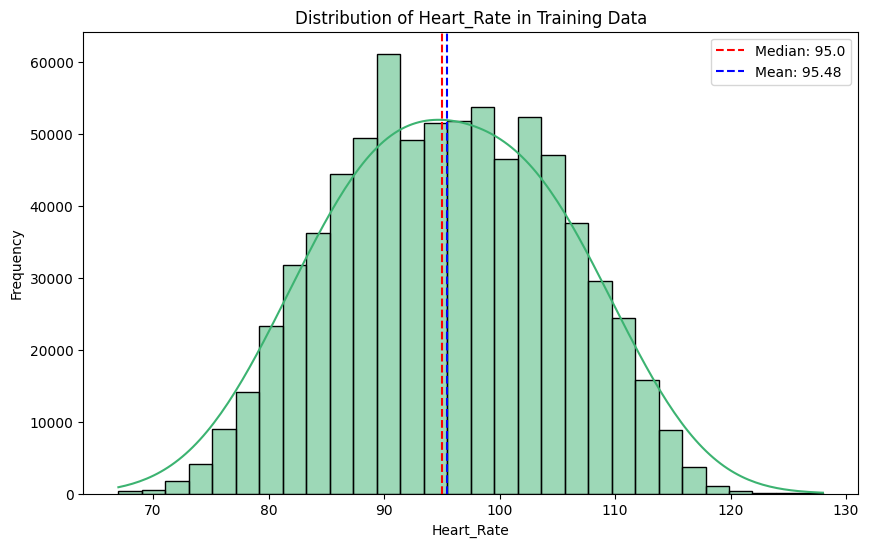

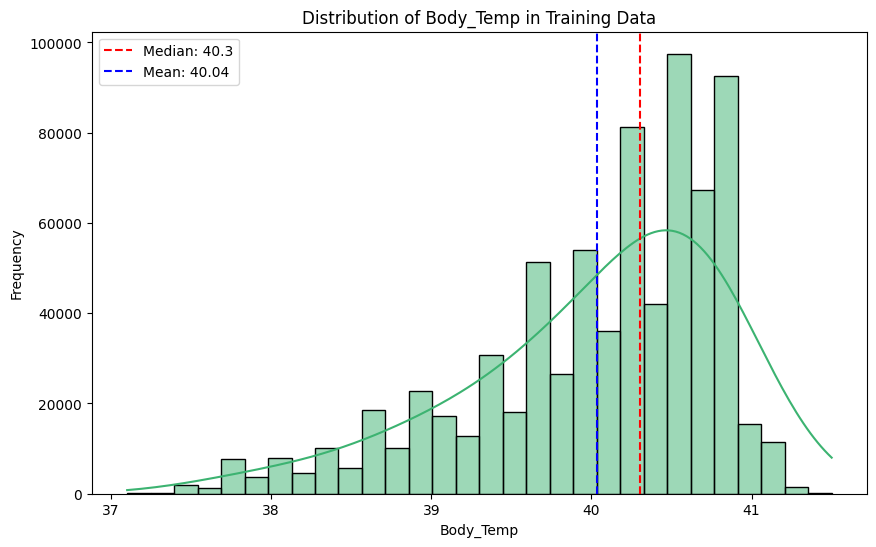

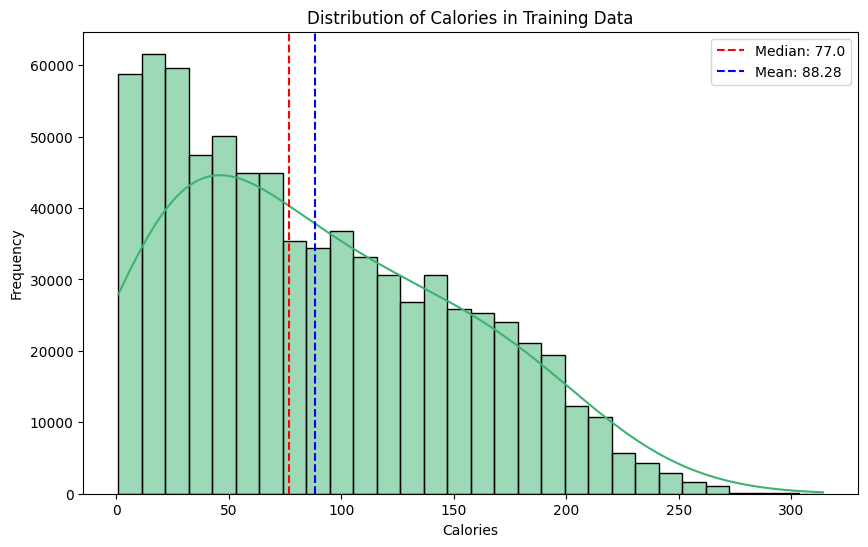

In [6]:
quantitative_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

for quantitative_feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[quantitative_feature], bins=30, kde=True, color='mediumseagreen', kde_kws={'bw_method': 0.5})
    plt.title(f'Distribution of {quantitative_feature} in Training Data')
    plt.xlabel(quantitative_feature)
    plt.ylabel('Frequency')

    feature_median = train_data[quantitative_feature].median()
    feature_mean = train_data[quantitative_feature].mean()

    plt.axvline(feature_median, color='red', linestyle='--', label=f'Median: {round(feature_median, 2)}')
    plt.axvline(feature_mean, color='blue', linestyle='--', label=f'Mean: {round(feature_mean, 2)}')
    plt.legend()
    plt.show()

In [7]:
# proportions of train vs test data?
all_data['train'].value_counts(normalize=True)

train,proportion
bool,f64
false,0.25
true,0.75


# Bivariate Analyses of Training Data

Text(0.5, 1.0, 'Correlation Heatmap of Quantitative Features in Training Data')

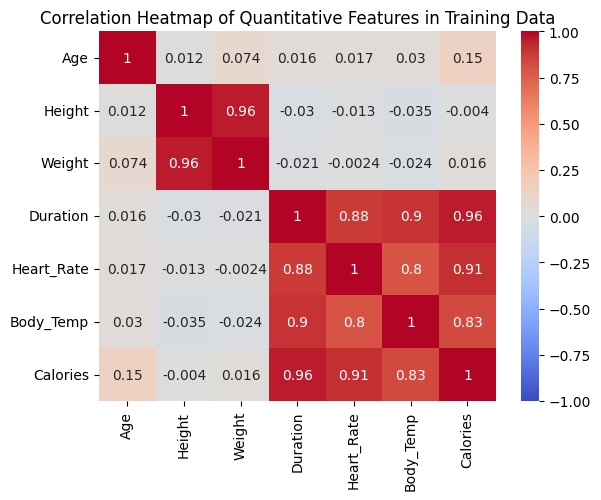

In [8]:
sns.heatmap(train_data[quantitative_features].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', xticklabels=quantitative_features, yticklabels=quantitative_features)
plt.title('Correlation Heatmap of Quantitative Features in Training Data')

Text(0.5, 1.02, 'Pairplot of Quantitative Features in Training Data')

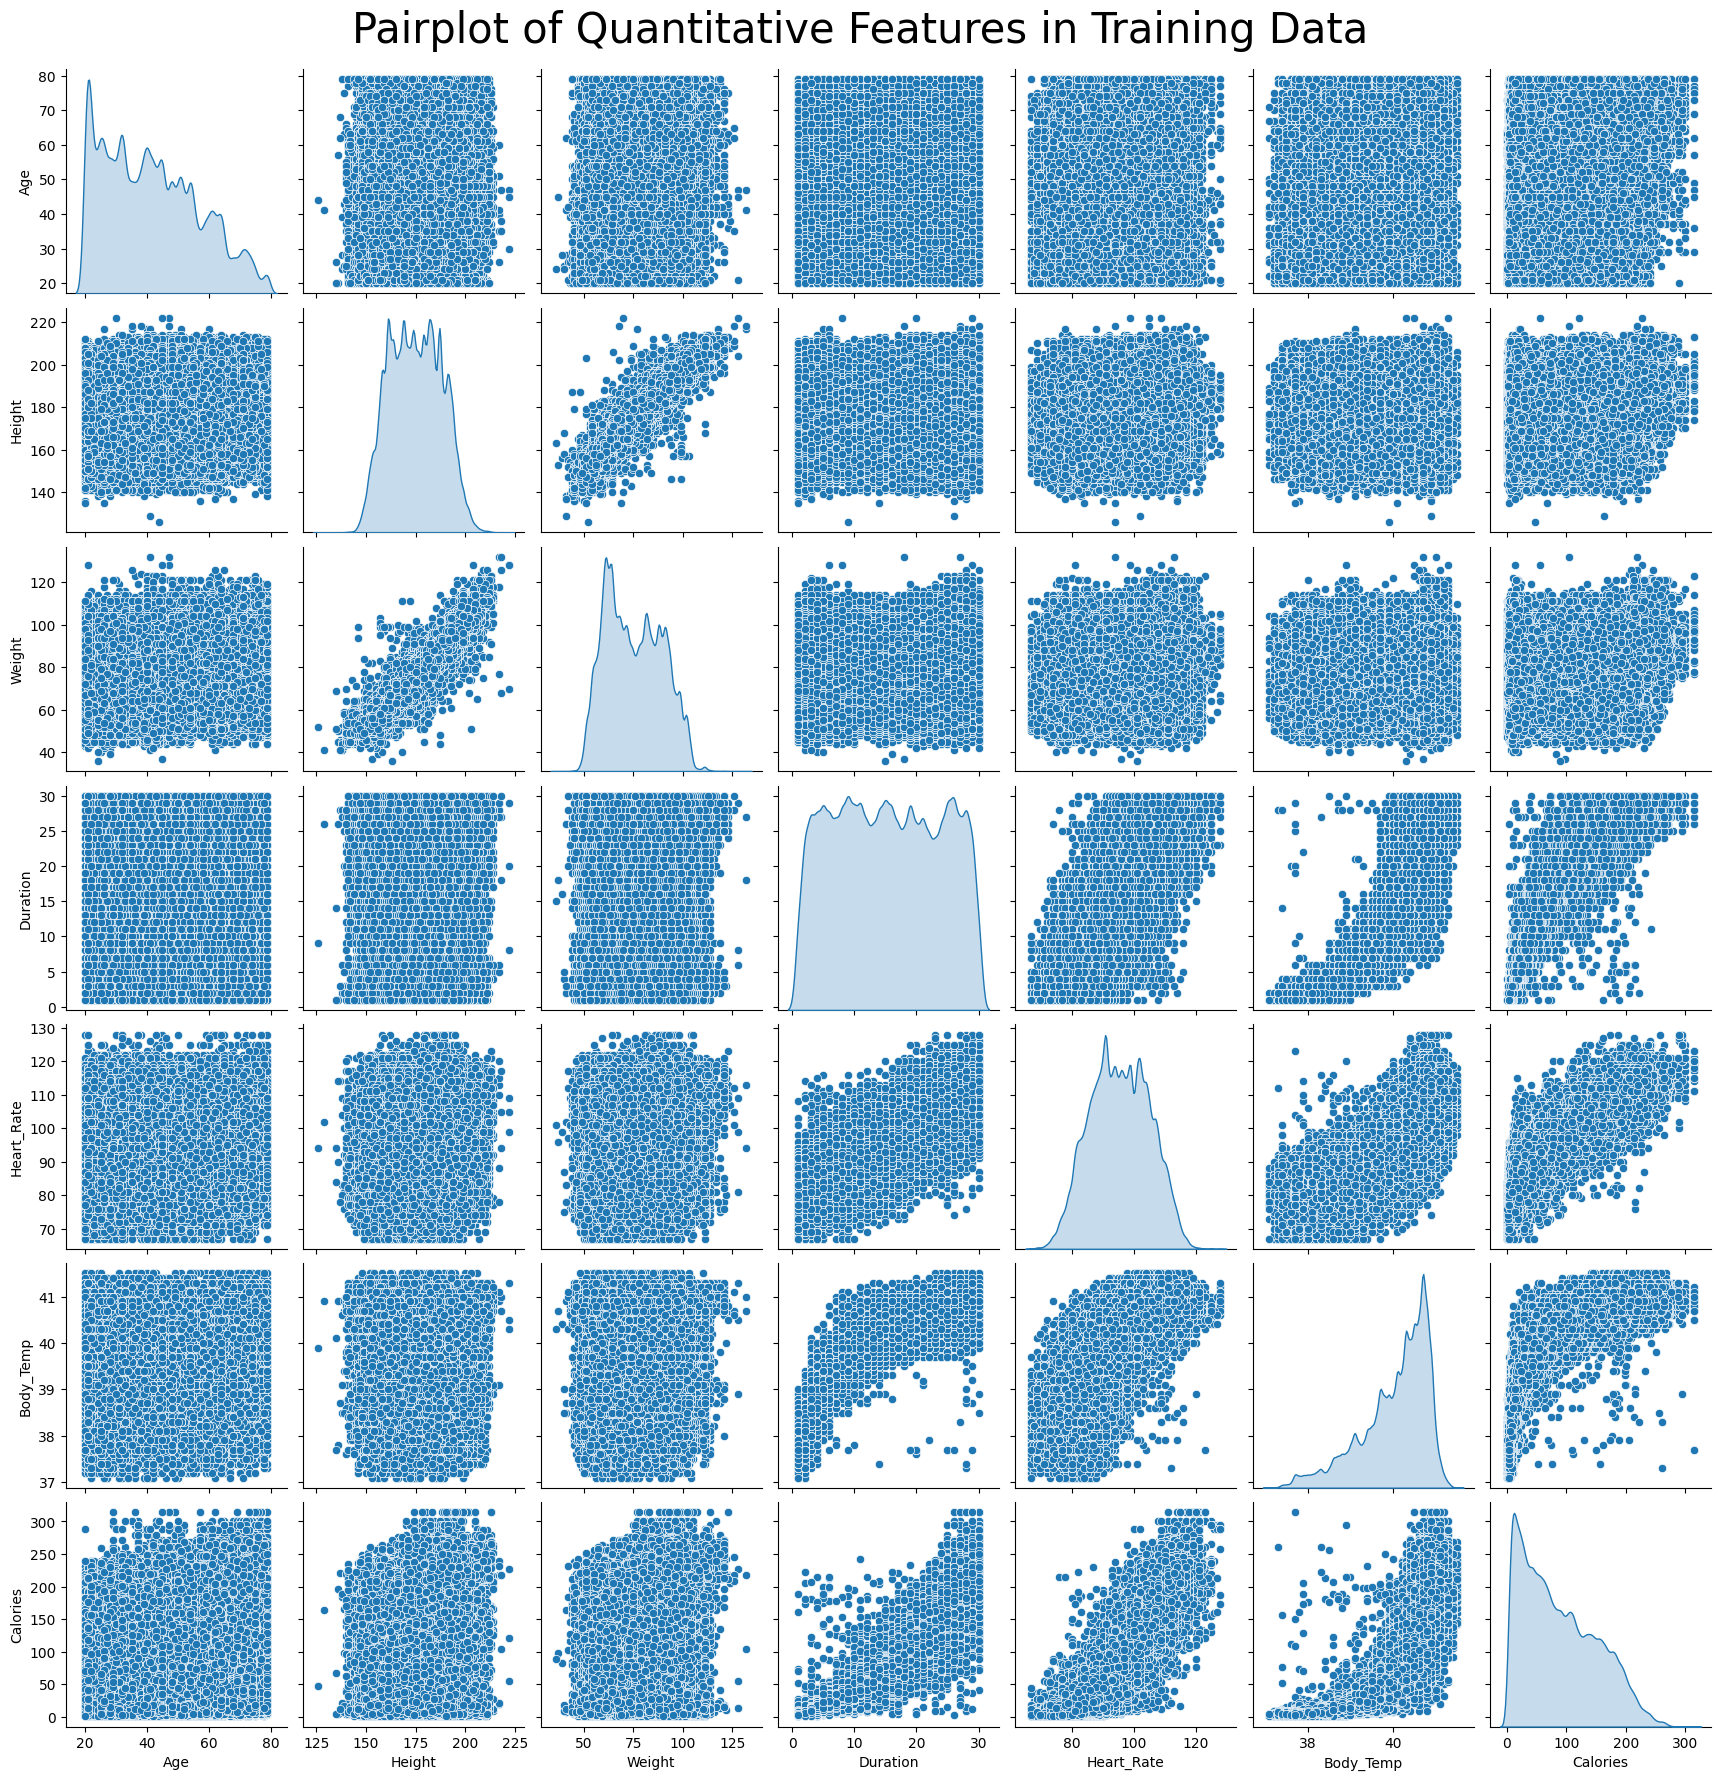

In [9]:
# this plot takes a minute
sns.pairplot(train_data[quantitative_features].to_pandas(), diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Quantitative Features in Training Data', y=1.02, fontsize=30)

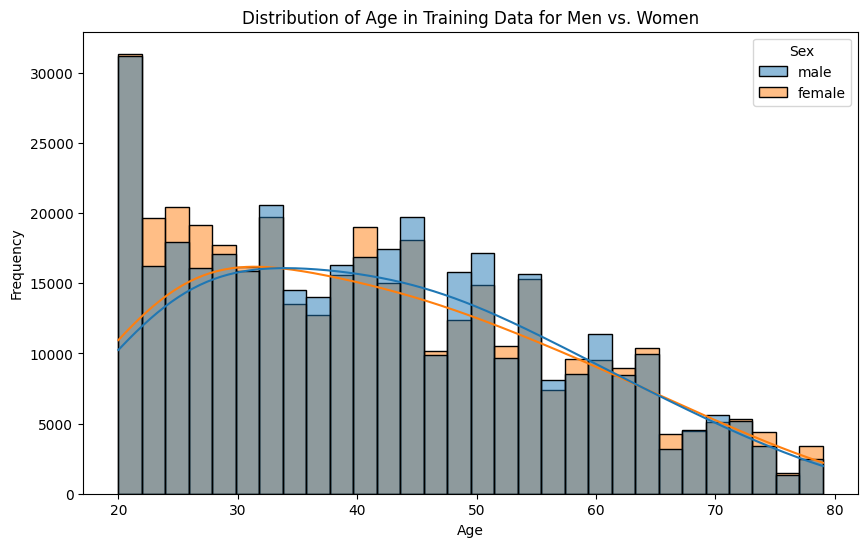

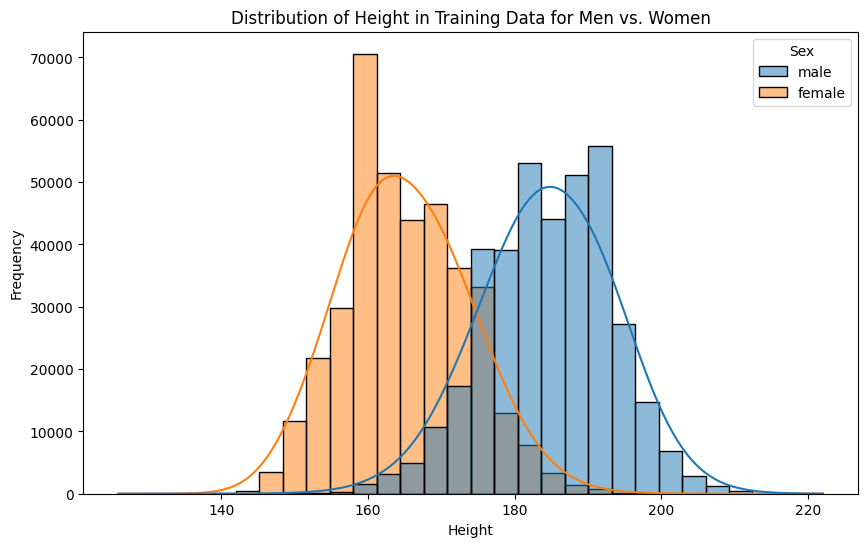

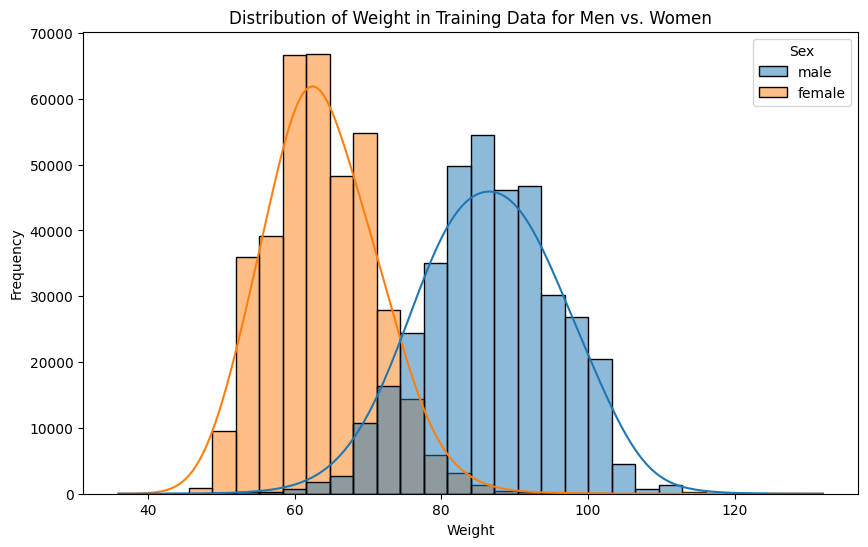

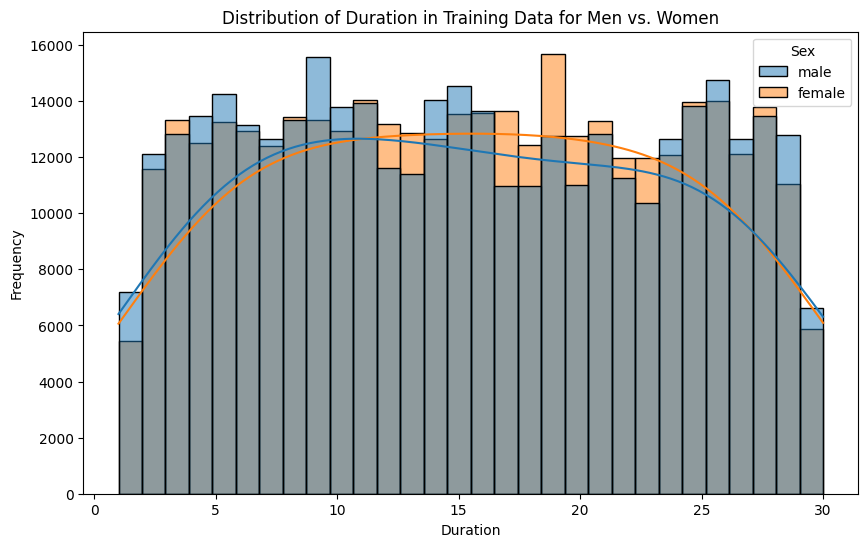

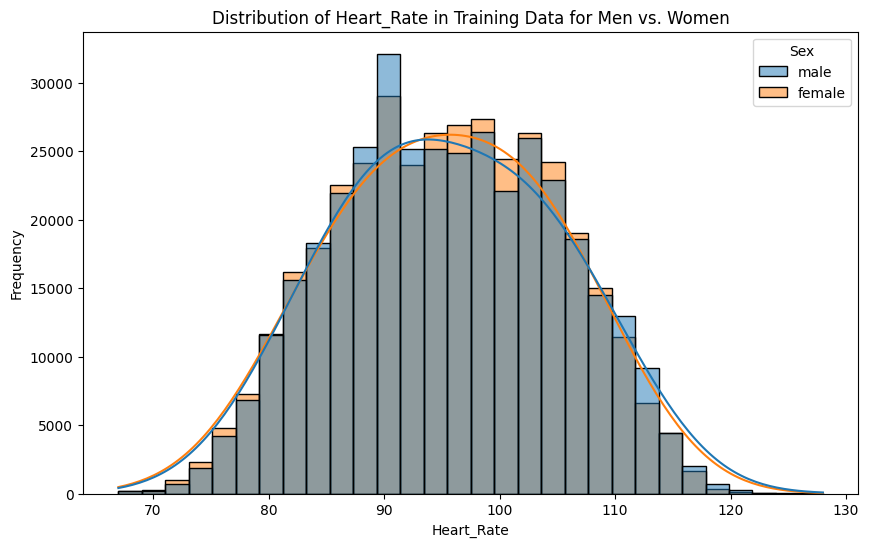

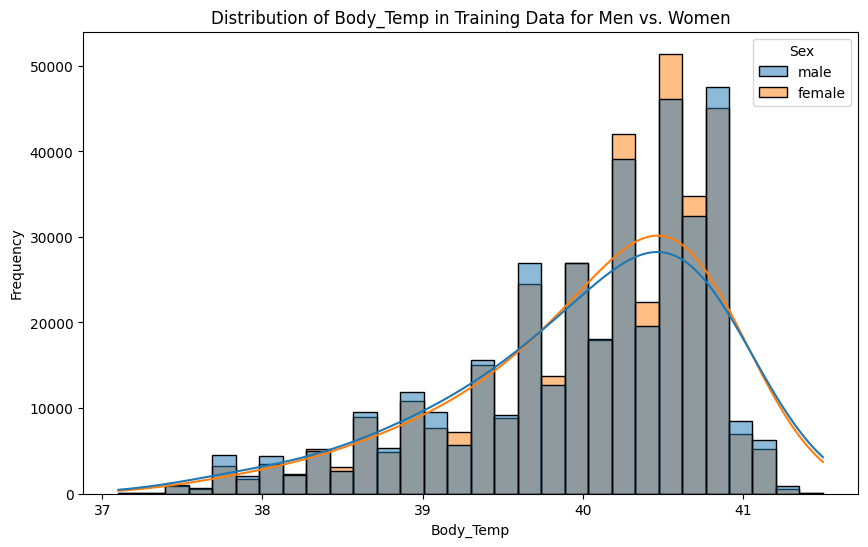

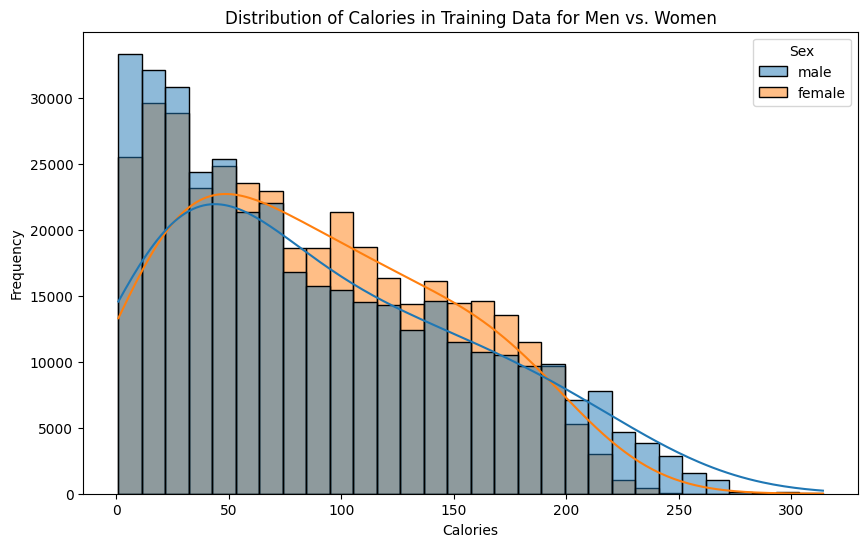

In [10]:
# how do distributions differ between men and women
sex_train = train_data['Sex']
for quantitative_feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_data, x=quantitative_feature, bins=30, kde=True, color='mediumseagreen', kde_kws={'bw_method': 0.5}, hue='Sex')
    plt.title(f'Distribution of {quantitative_feature} in Training Data for Men vs. Women')
    plt.xlabel(quantitative_feature)
    plt.ylabel('Frequency')
    
    plt.show()

In [11]:
# compute mean by gender for all quantitative features
train_data.group_by(pl.col('Sex')).agg(pl.all().mean())

Sex,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""male""",374985.450009,41.567724,184.410448,86.609032,15.340708,95.570366,40.023803,89.033683,1.0
"""female""",375013.496068,41.27365,165.0222,63.7263,15.501013,95.397955,40.048655,87.534761,1.0


In [12]:
# compute median by gender for all quantitative features
train_data.group_by(pl.col('Sex')).agg(pl.all().median())

Sex,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,train
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""male""",375062.0,40.0,184.0,87.0,15.0,95.0,40.2,73.0,1.0
"""female""",374942.0,40.0,164.0,63.0,16.0,96.0,40.3,80.0,1.0


# Inspecting Some of the Nonlinear Relationships from the Pairplot

namely body temperature vs calories.

In [13]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Body Temperature vs Calories with Linear Regression Fit')

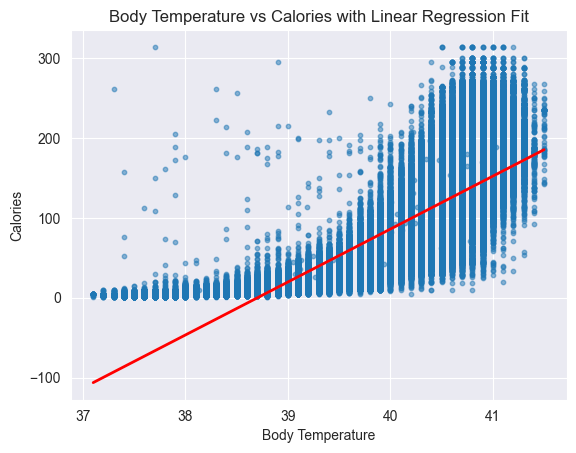

In [14]:
sns.regplot(data=train_data, x='Body_Temp', y='Calories', 
            scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2}, order=1)

plt.xlabel('Body Temperature')
plt.ylabel('Calories')

plt.title('Body Temperature vs Calories with Linear Regression Fit')

Text(0.5, 1.02, 'Distribution of Body Temperature vs Calories in Training Data')

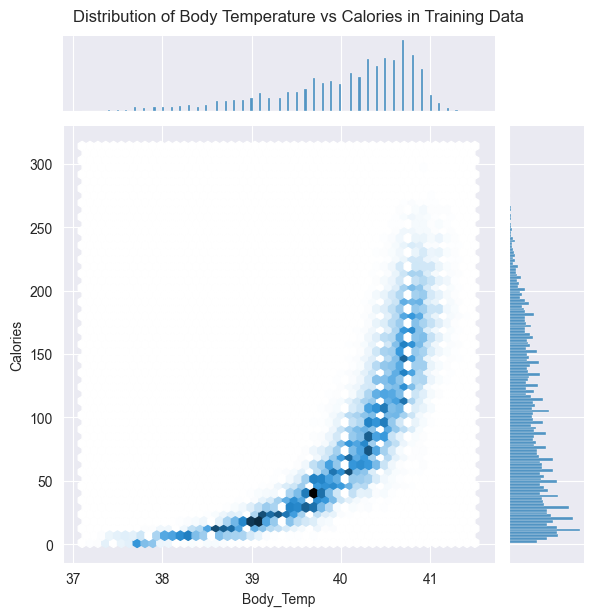

In [15]:
sns.jointplot(data=train_data, x='Body_Temp', y='Calories', kind='hex')
plt.suptitle('Distribution of Body Temperature vs Calories in Training Data', y=1.02)

Text(0.5, 1.02, 'Distribution of exp(Body Temperature) vs Calories in Training Data')

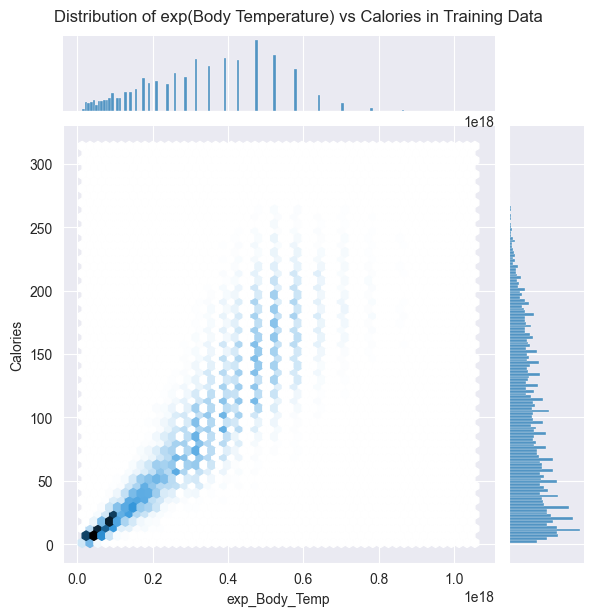

In [16]:
train_data = train_data.with_columns(exp_Body_Temp=pl.col('Body_Temp').exp())

sns.jointplot(data=train_data, x='exp_Body_Temp', y='Calories', kind='hex')
plt.suptitle('Distribution of exp(Body Temperature) vs Calories in Training Data', y=1.02)

Text(0.5, 1.0, 'exp(Body Temperature) vs Calories with Linear Regression Fit')

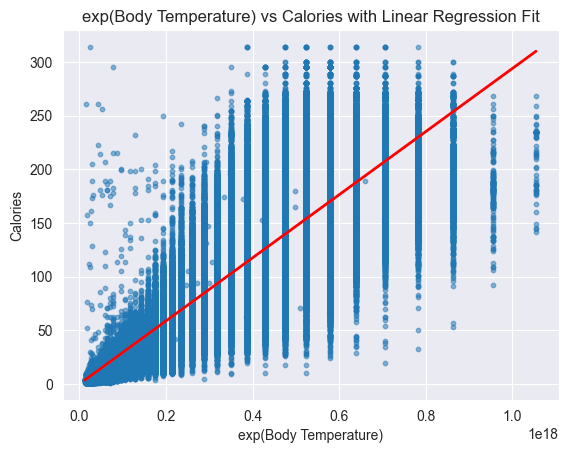

In [17]:
sns.regplot(data=train_data, x='exp_Body_Temp', y='Calories', 
            scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2}, order=1)

plt.xlabel('exp(Body Temperature)')
plt.ylabel('Calories')

plt.title('exp(Body Temperature) vs Calories with Linear Regression Fit')

In [18]:
# is exp(Body_Temp) a better linear fit based on pearson correlation coefficient
train_data[['Body_Temp', 'exp_Body_Temp', 'Calories']].corr()

Body_Temp,exp_Body_Temp,Calories
f64,f64,f64
1.0,0.923862,0.828671
0.923862,1.0,0.897801
0.828671,0.897801,1.0


^^ Conclusion: yes (r = .898 vs .829)

In [19]:
# adding exp(Body_Temp) to the dataset and removing Body_Temp
all_data = all_data.with_columns(exp_Body_Temp=pl.col('Body_Temp').exp())
all_data = all_data.drop('Body_Temp')

all_data.head()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Calories,train,exp_Body_Temp
i64,str,i64,f64,f64,f64,f64,f64,bool,f64
0,"""male""",36,189.0,82.0,26.0,101.0,150.0,true,6.3984e17
1,"""female""",64,163.0,60.0,8.0,85.0,34.0,true,1.7438e17
2,"""female""",51,161.0,64.0,7.0,84.0,29.0,true,1.9272e17
3,"""male""",20,192.0,90.0,25.0,105.0,140.0,true,4.7401e17
4,"""female""",38,166.0,61.0,25.0,102.0,146.0,true,4.2890e17


In [20]:
quantitative_features.remove('Body_Temp')
quantitative_features.append('exp_Body_Temp')

# BMI?

The height is given in cm and the weight is given in kg, and the formula for BMI is:

$$
\text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2}
$$

... so we'll have to convert a bit to compute BMI. 

In [21]:
# create new height metric in meters
all_data = all_data.with_columns(height_meters = pl.col('Height') / 100)

# compute bmi
all_data = all_data.with_columns(bmi = pl.col('Weight') / (pl.col('height_meters') ** 2))

# drop the height_meters column
all_data = all_data.drop('height_meters')

all_data.head()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Calories,train,exp_Body_Temp,bmi
i64,str,i64,f64,f64,f64,f64,f64,bool,f64,f64
0,"""male""",36,189.0,82.0,26.0,101.0,150.0,true,6.3984e17,22.955684
1,"""female""",64,163.0,60.0,8.0,85.0,34.0,true,1.7438e17,22.582709
2,"""female""",51,161.0,64.0,7.0,84.0,29.0,true,1.9272e17,24.690405
3,"""male""",20,192.0,90.0,25.0,105.0,140.0,true,4.7401e17,24.414062
4,"""female""",38,166.0,61.0,25.0,102.0,146.0,true,4.2890e17,22.13674


In [22]:
# bmi is one of us now!
quantitative_features = list(set(quantitative_features + ['bmi']))

quantitative_features

['Weight',
 'exp_Body_Temp',
 'Heart_Rate',
 'bmi',
 'Calories',
 'Height',
 'Duration',
 'Age']

In [23]:
all_data['bmi'].describe()

statistic,value
str,f64
"""count""",1e6
"""null_count""",0.0
"""mean""",24.373046
"""std""",1.511426
"""min""",12.375937
"""25%""",23.255019
"""50%""",24.386526
"""75%""",25.484765
"""max""",46.443986


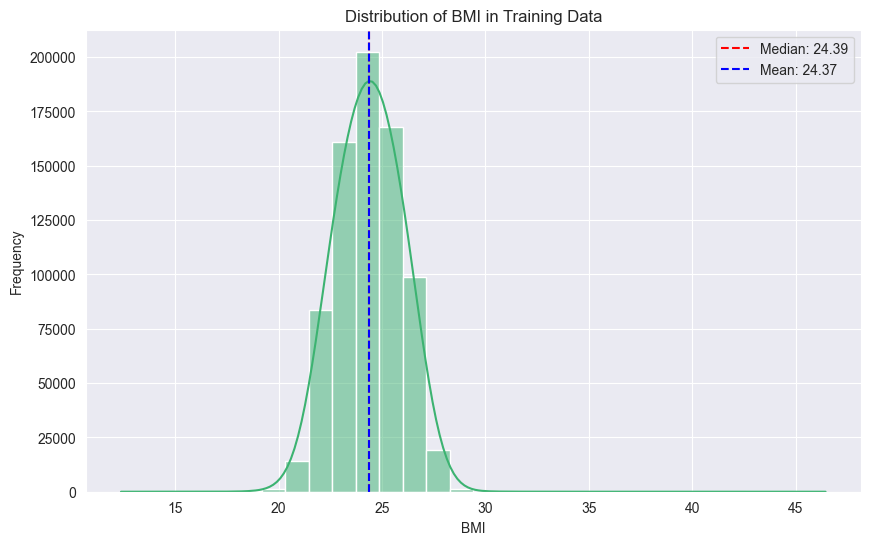

In [24]:
train_data_bmi = all_data.filter(pl.col('train') == True)

# plot the distribution of bmi
plt.figure(figsize=(10, 6))
sns.histplot(train_data_bmi['bmi'], bins=30, kde=True, color='mediumseagreen', kde_kws={'bw_method': 0.5})
plt.title(f'Distribution of BMI in Training Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')

feature_median = train_data_bmi['bmi'].median()
feature_mean = train_data_bmi['bmi'].mean()

plt.axvline(feature_median, color='red', linestyle='--', label=f'Median: {round(feature_median, 2)}')
plt.axvline(feature_mean, color='blue', linestyle='--', label=f'Mean: {round(feature_mean, 2)}')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

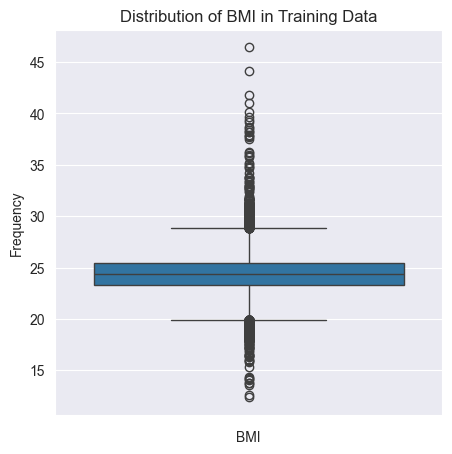

In [25]:
# same thing but a boxplot. Want to see outliers
plt.figure(figsize=(5, 5))
sns.boxplot(train_data_bmi['bmi'])
plt.title(f'Distribution of BMI in Training Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Correlation Heatmap of Modified Quantitative Features in Training Data')

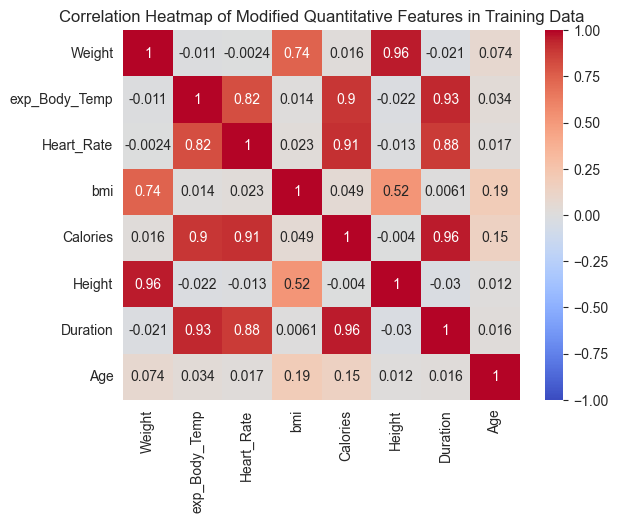

In [26]:
# what do the correlations look like now?
sns.heatmap(train_data_bmi[quantitative_features].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', xticklabels=quantitative_features, yticklabels=quantitative_features)
plt.title('Correlation Heatmap of Modified Quantitative Features in Training Data')

# Fit an initial linear model for analysis

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error

In [28]:
# convert string categorical column 'Sex' to 2 binary one-hot encoded columns
all_data = all_data.to_dummies('Sex')

In [29]:
X = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp']))
y = all_data.filter(pl.col('train') == True).select(pl.col('Calories'))

In [30]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X).clip(0, None) # so we don't get negative values and break the log

root_mean_squared_log_error(y.to_numpy(), y_pred)

0.6447743319740328

In [33]:
# what about R^2?
model.score(X, y)

0.9599661554514455

In [31]:
coefficients = {feature_name : coefficient for feature_name, coefficient in zip(model.feature_names_in_, model.coef_[0])}

coefficients

{'Sex_female': np.float64(0.1672115037511999),
 'Sex_male': np.float64(-0.16721150375114197),
 'Age': np.float64(0.5255566456111208),
 'Height': np.float64(-2.1450267961433784),
 'Weight': np.float64(2.6069431274458754),
 'Duration': np.float64(5.254821261230828),
 'Heart_Rate': np.float64(1.9192759302422788),
 'bmi': np.float64(-7.695606955943365)}

<BarContainer object of 8 artists>

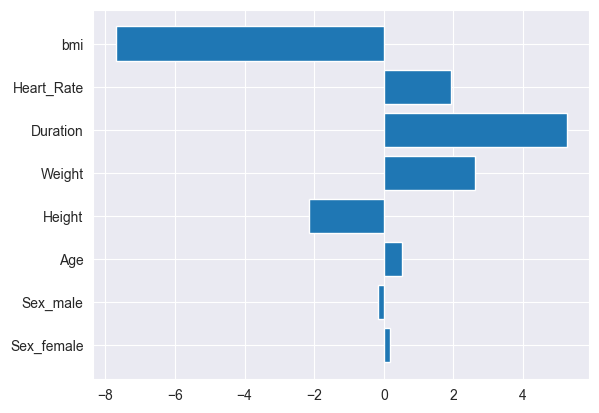

In [32]:
plt.barh(coefficients.keys(), coefficients.values())

In [41]:
# analyzing matrix stability. Was having problems fitting the linear model when exp_Body_Temp was included
# and suspected it was because of extreme values in exp_Body_Temp. So checking here
X_with_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train'])).to_numpy()
X_without_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp'])).to_numpy()

# generally log base 10 of the condition number is the number of digits of precision lost when doing matrix inversion
np.linalg.cond(X_with_exp_BT), np.linalg.cond(X_without_exp_BT)

(np.float64(1.841869651953092e+34), np.float64(55556.45951351673))

So yes, my hypothesis was correct. exp_Body_Weight is causing problems due to extremely high values. Will need to correct somehow.

Typically this kind of thing is caused by a lot of multicollinearity but in this case we know that's not what's causing it since several of the features besides exp_Body_Temp are correlated.

# Scaling exp_Body_Temp to fix numerical instability problems

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
# min-max scale exp_Body_Temp
exp_Body_Temp_train = all_data.filter(pl.col('train') == True).select(pl.col('exp_Body_Temp')).to_numpy()
exp_Body_Temp_test = all_data.filter(pl.col('train') == False).select(pl.col('exp_Body_Temp')).to_numpy()

scaler = MinMaxScaler()

# obtain the max and min based on the training set to avoid data leakage
scaled_exp_Body_Temp_train = scaler.fit_transform(exp_Body_Temp_train)
scaled_exp_Body_Temp_test = scaler.transform(exp_Body_Temp_test)

# we expect the scaled values to be between 0 and 1
scaled_exp_Body_Temp_train.min(), scaled_exp_Body_Temp_train.max(), scaled_exp_Body_Temp_test.min(), scaled_exp_Body_Temp_test.max()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [52]:
scaled_exp_Body_Temp = np.concat([scaled_exp_Body_Temp_train, scaled_exp_Body_Temp_test], axis = 0).flatten()

all_data = all_data.with_columns(scaled_exp_Body_Temp=scaled_exp_Body_Temp)

all_data

id,Sex_female,Sex_male,Age,Height,Weight,Duration,Heart_Rate,Calories,train,exp_Body_Temp,bmi,scaled_exp_Body_Temp
i64,u8,u8,i64,f64,f64,f64,f64,f64,bool,f64,f64,f64
0,0,1,36,189.0,82.0,26.0,101.0,150.0,true,6.3984e17,22.955684,0.60164
1,1,0,64,163.0,60.0,8.0,85.0,34.0,true,1.7438e17,22.582709,0.154924
2,1,0,51,161.0,64.0,7.0,84.0,29.0,true,1.9272e17,24.690405,0.172524
3,0,1,20,192.0,90.0,25.0,105.0,140.0,true,4.7401e17,24.414062,0.442484
4,1,0,38,166.0,61.0,25.0,102.0,146.0,true,4.2890e17,22.13674,0.399193
…,…,…,…,…,…,…,…,…,…,…,…,…
999995,1,0,56,159.0,62.0,6.0,85.0,null,false,1.2918e17,24.524346,0.111549
999996,0,1,32,202.0,101.0,3.0,84.0,null,false,4.7523e16,24.752475,0.033179
999997,1,0,31,164.0,64.0,14.0,98.0,null,false,2.6014e17,23.79536,0.237232


In [57]:
# now see what the effect of exp_Body_Temp on matrix stability is 
X_with_scaled_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp'])).to_numpy()
X_without_scaled_exp_BT = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train', 'exp_Body_Temp', 'scaled_exp_Body_Temp'])).to_numpy()

np.linalg.cond(X_with_scaled_exp_BT), np.linalg.cond(X_without_scaled_exp_BT)

(np.float64(55569.27008422108), np.float64(55556.45951351673))

Conclusion: 'exp_Body_Temp' won't break matrix inversion!

In [58]:
# drop the unscaled exp_Body_Temp column
all_data = all_data.drop('exp_Body_Temp')

In [59]:
X = all_data.filter(pl.col('train') == True).select(pl.exclude(['Calories', 'id', 'train']))
y = all_data.filter(pl.col('train') == True).select(pl.col('Calories'))

In [60]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X).clip(0, None) # so we don't get negative values and break the log

root_mean_squared_log_error(y.to_numpy(), y_pred)

0.644751397204762

In [61]:
# what about R^2?
model.score(X, y)

0.9599663948007923

In [62]:
coefficients = {feature_name : coefficient for feature_name, coefficient in zip(model.feature_names_in_, model.coef_[0])}

coefficients

{'Sex_female': np.float64(0.16767080871634046),
 'Sex_male': np.float64(-0.16767080871628504),
 'Age': np.float64(0.5256554668274868),
 'Height': np.float64(-2.145864264200764),
 'Weight': np.float64(2.6079767257351008),
 'Duration': np.float64(5.263971173986482),
 'Heart_Rate': np.float64(1.9194595518734985),
 'bmi': np.float64(-7.698507153836215),
 'scaled_exp_Body_Temp': np.float64(-0.49471787687881885)}

<BarContainer object of 9 artists>

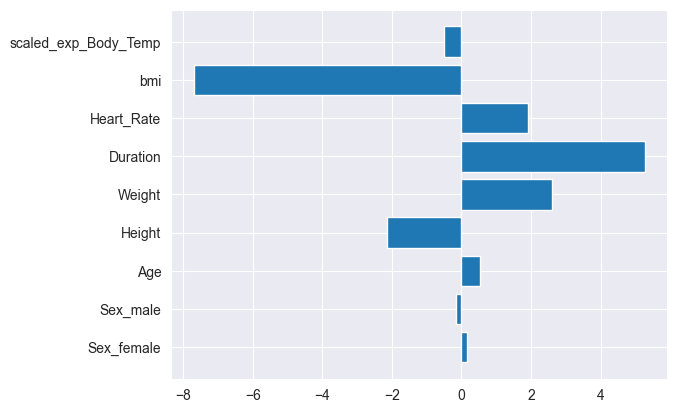

In [63]:
plt.barh(coefficients.keys(), coefficients.values())

Text(0.5, 1.02, 'Distribution of scaled exp(Body Temperature) vs Calories in Training Data')

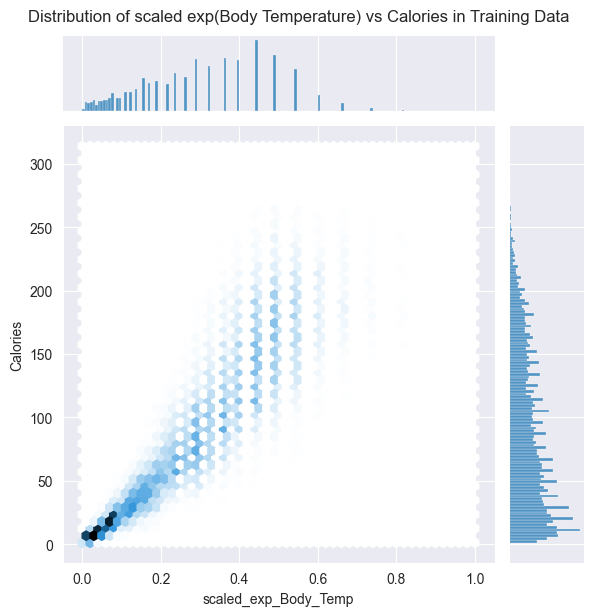

In [65]:
# what's the new relationship?
train_data = all_data.filter(pl.col('train') == True)

sns.jointplot(data=train_data, x='scaled_exp_Body_Temp', y='Calories', kind='hex')
plt.suptitle('Distribution of scaled exp(Body Temperature) vs Calories in Training Data', y=1.02)